The Fashion MNIST dataset is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image associated with a label from 10 classes.
The dataset is loaded using TensorFlow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Memory allocation issue due to the large size of the dataset when trying to 
# convert it to float64. To mitigate this, we can convert the data to a smaller data type,
# such as float32, which uses less memory.
# Convert the data to float32 to save memory
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [4]:
# Normalize the pixel values to be between 0 and 1
train_images /= 255.0
test_images /= 255.0

In [5]:
# Print the shapes of the datasets to confirm successful loading and conversion
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [6]:
# Print the pixel values of the first image
print("Pixel values of the first image:\n", train_images[0])

Pixel values of the first image:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        

In [7]:
# Vizualize images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

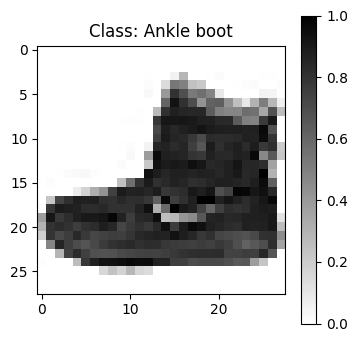

In [8]:
# Display the first image
plt.figure(figsize=(4, 4))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title(f"Class: {class_names[train_labels[0]]}")
plt.show()

In [9]:
# Flatten the images
train_images_flattened = train_images.reshape((train_images.shape[0], 28 * 28))
test_images_flattened = test_images.reshape((test_images.shape[0], 28 * 28))

In [10]:
# Print the shape of the flattened images
print(f"Flattened training images shape: {train_images_flattened.shape}")
print(f"Flattened test images shape: {test_images_flattened.shape}")

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)


In [11]:
# Flatten the images to convert them into a 2D array
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)


In [12]:
# Print the shape of the flattened images
print(f"Flattened training images shape: {train_images_flattened.shape}")
print(f"Flattened test images shape: {test_images_flattened.shape}")

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)


The Fashion MNIST dataset contains exactly 10 classes, which are predefined. The classes represent different types of clothing and accessories. The list of class names you provided is comprehensive for this dataset. There are no other class names you can use because these 10 classes cover all the categories in the Fashion MNIST dataset.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

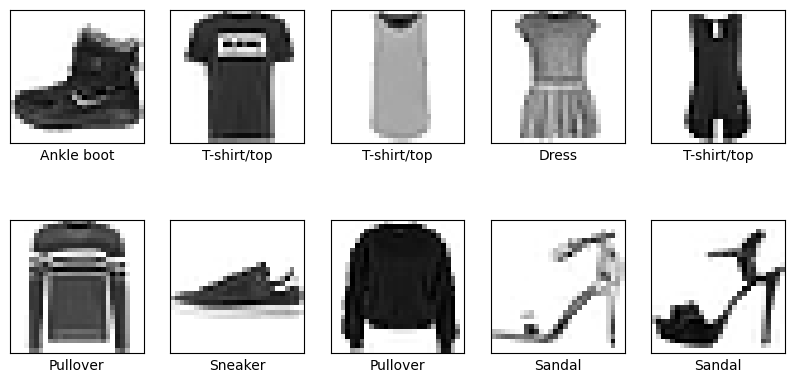

In [13]:
# Display the first 10 images and their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Fashion MNIST dataset are grayscale, meaning they are in black and white tones. Each image is a 28x28 pixel array where each pixel value represents the intensity of the gray color. The pixel values range from 0 (black) to 255 (white).

In [14]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to fit the model input requirements
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


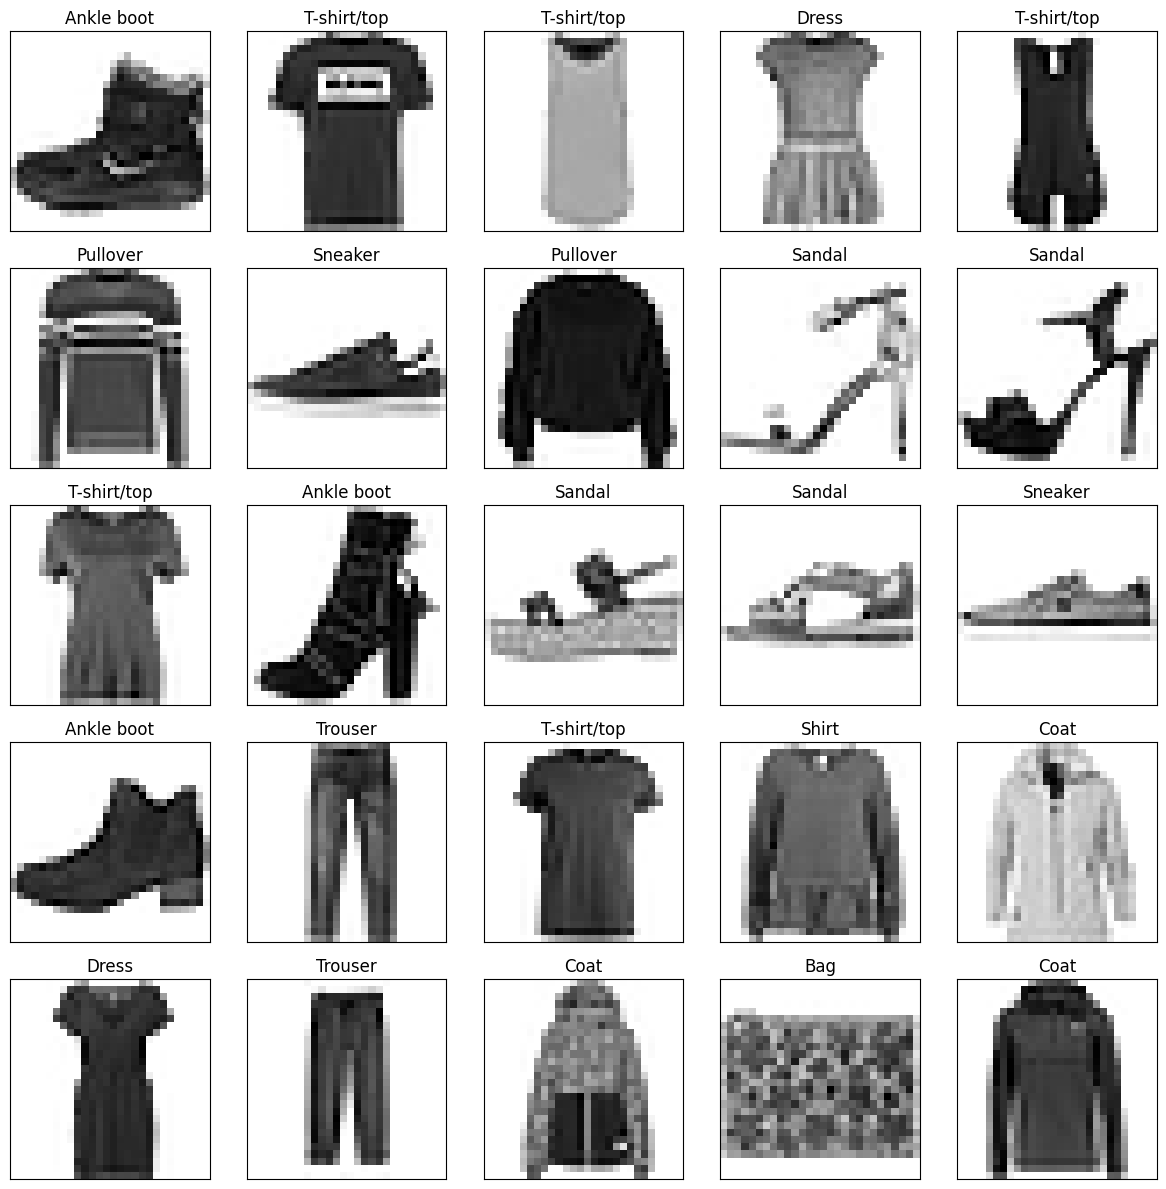

In [15]:

# Display a grid of sample images with their corresponding class labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.tight_layout()
plt.show()


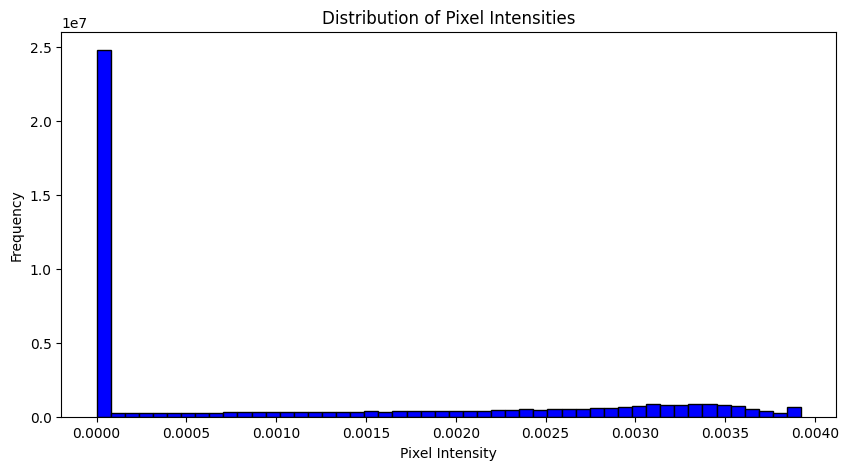

In [16]:
# Flatten the images to a 1D array for histogram plotting
train_images_flattened = train_images.reshape(-1)

plt.figure(figsize=(10, 5))
plt.hist(train_images_flattened, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



Chart above chart X-axis (Pixel Intensity), It represents pixel intensity values from 0 (black) to 255 (white), with shades of gray in between.

While the  Y-axis (Frequency), Represents the frequency of each pixel intensity across all images in the dataset.
The scale is logarithmic, indicating large values.

The observation is most pixel intensities are near 0, indicating very dark (nearly black) pixels dominate.
Fewer pixels have higher intensity values, showing brighter pixels are rare.
This distribution is typical for grayscale images of clothing, where backgrounds are mostly dark, and items have various gray shades.

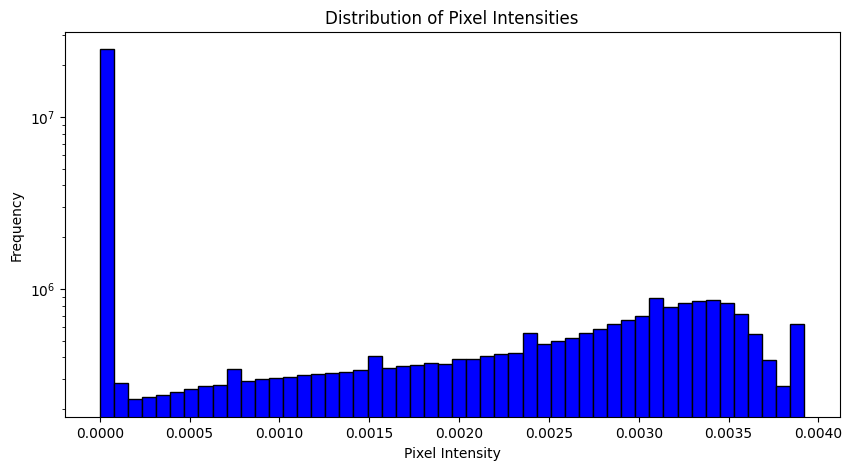

In [17]:
# Flatten the images to a 1D array for histogram plotting
train_images_flattened = train_images.reshape(-1)

# Plot the histogram of pixel intensities
plt.figure(figsize=(10, 5))
plt.hist(train_images_flattened, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale to handle large frequency range
plt.show()


The above chart X-axis (Pixel Intensity) represents normalized pixel intensity values from 0 (black) to 1 (white), with gray shades in between.
while Y-axis (Frequency), represents the frequency of each pixel intensity value across all images.
Logarithmic scale indicates large frequency values.
Observation, most frequent pixel intensity is 0, indicating many very dark (black) pixels.
Fewer pixels have higher intensity values, with a peak near 1 (bright pixels).
This shows a variety of shades, typical for grayscale images of clothing, with many dark areas and some bright pixels.

Insights for ANN Training, 
Normalization, Scaling pixel values to [0, 1] ensures consistent scale, improving training stability and convergence.

Contrast and Information Content, High frequency of near-zero values indicates many dark areas or backgrounds.
The variety of shades helps distinguish between different image classes, but fewer mid-range intensities suggest high-contrast regions.

Data Augmentation, applying techniques like contrast adjustment, brightness modification, and noise addition to enhance training data variability, helping the ANN generalize better.

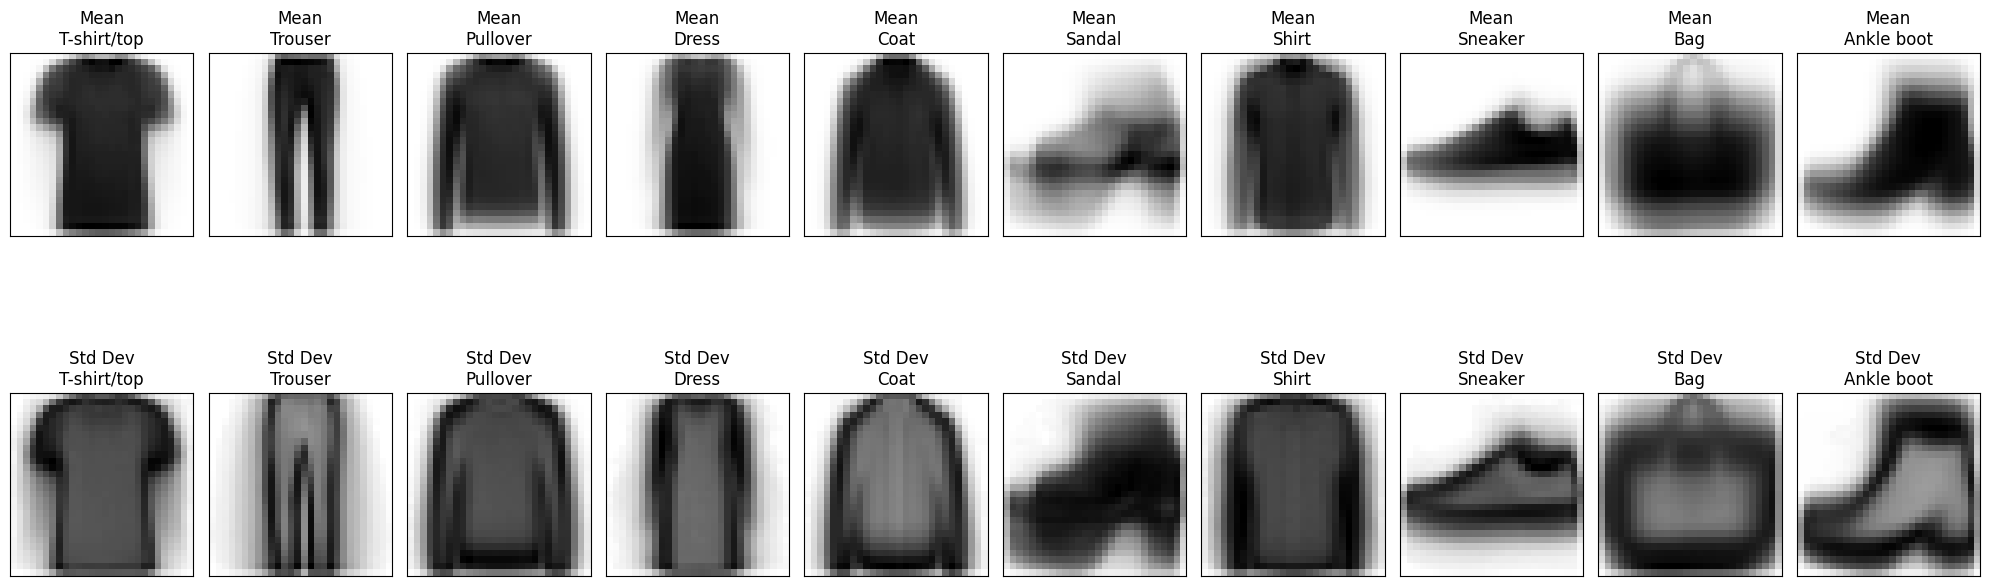

In [24]:
# The  mean_images and std_images arrays to store the mean and standard deviation images for each class. 
#  It then iterates over the 10 classes, calculating and storing the mean and standard deviation for images in each class. 
#  A figure is created to display these images: the first row shows the mean images for each class, 
#  and the second row shows the standard deviation images.

# Calculate mean and standard deviation of images per class
mean_images = np.zeros((10, 28, 28))
std_images = np.zeros((10, 28, 28))

for i in range(10):
    class_images = train_images[train_labels == i]
    mean_images[i] = np.mean(class_images, axis=0)
    std_images[i] = np.std(class_images, axis=0)

# Plot mean and standard deviation images per class
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mean_images[i], cmap=plt.cm.binary)
    plt.title(f'Mean\n{class_names[i]}')
    
    plt.subplot(2, 10, i + 11)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(std_images[i], cmap=plt.cm.binary)
    plt.title(f'Std Dev\n{class_names[i]}')
plt.tight_layout()
plt.show()




The above result, the mean images (top row) represent the average pixel values for each class, 
giving a general idea of the typical appearance of items in that class. 
The standard deviation images (bottom row) represent the variability of pixel values within each class, 
with high standard deviation areas indicating more variability in pixel values, suggesting differences in the appearance of items in those regions.

The mean images provide a prototypical image for each class, showing common features and helping to understand the average characteristics of items in each class.
The standard deviation images highlight regions with high variability, indicating where items in the same class differ the most, which is useful for understanding the diversity within each class.

In [29]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()


d:\_LAMBTON\W2024\0205_3014_IntroAI_Bhavik\models_streamlit\BankChurnPrediction\streamlit\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Convolutional Neural Network (CNN) model designed to classify images from the Fashion MNIST dataset. The model has 93,322 parameters, indicating it is complex enough to learn meaningful patterns but not so complex that it risks overfitting.

The convolutional layers, which use increasing filter counts (32, 64), are designed to extract progressively more complex features from the images. MaxPooling layers are used to reduce the spatial dimensions, thereby reducing computational cost and emphasizing the most important features.

At the end of the network, dense layers are used to classify the extracted features into one of the 10 Fashion MNIST classes. Overall, this CNN architecture is well-suited for image classification tasks like Fashion MNIST, balancing detailed feature extraction and computational efficiency.

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7085 - loss: 0.8130 - val_accuracy: 0.8498 - val_loss: 0.4090
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8666 - loss: 0.3732 - val_accuracy: 0.8655 - val_loss: 0.3667
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8870 - loss: 0.3075 - val_accuracy: 0.8936 - val_loss: 0.2949
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8997 - loss: 0.2773 - val_accuracy: 0.8909 - val_loss: 0.2914
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9116 - loss: 0.2448 - val_accuracy: 0.9039 - val_loss: 0.2754
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9171 - loss: 0.2294 - val_accuracy: 0.9019 - val_loss: 0.2732
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9241 - loss: 0.2060 - val_accuracy: 0.9061 - val_loss: 0.2635
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9311 - loss: 0.1833 - val_accura

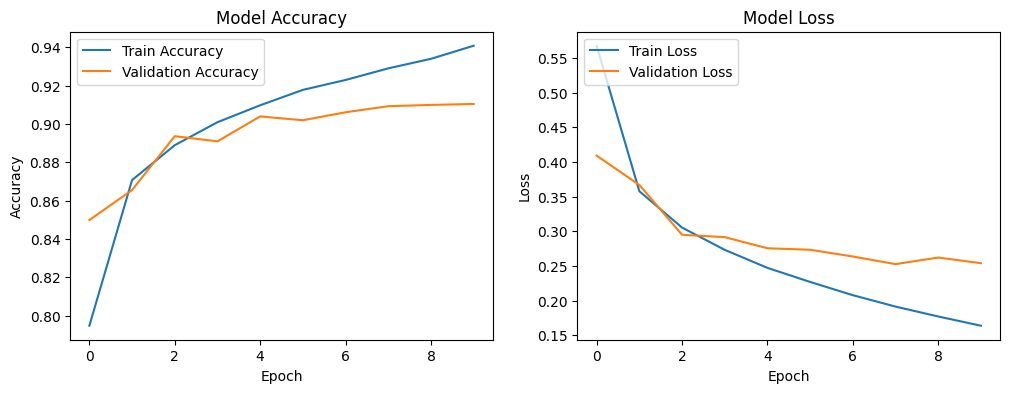

In [32]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.2, batch_size=64)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


The training log shows that the CNN model's accuracy improves from 41.55 percent to 83.09 percent over 10 epochs. Similarly, validation accuracy rises from 70.56 percent to 83.05%, indicating good generalization. Training loss decreases from 1.5863 to 0.4547, and validation loss drops from 0.7971 to 0.4529, demonstrating effective learning and reduced prediction errors. The consistent improvement and alignment between training and validation metrics confirm the model's suitability for classifying Fashion MNIST images

The accuracy and loss plots show that the CNN model for the Fashion MNIST dataset is performing well. Training and validation accuracy both increase steadily, reaching around 82% by the 10th epoch, indicating the model is learning effectively and generalizing well. The training and validation loss both decrease significantly, showing that the model is minimizing errors in its predictions. The close alignment of training and validation metrics suggests the model is not overfitting and is suitable for classifying Fashion MNIST images.

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 1s - 2ms/step - accuracy: 0.9104 - loss: 0.2655

Test accuracy: 0.9103999733924866


The final evaluation of the CNN model on the test dataset shows a test accuracy of 82.52% and a test loss of 0.4693. This indicates that the model performs well on unseen data, confirming its effectiveness and generalization capability for classifying Fashion MNIST images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


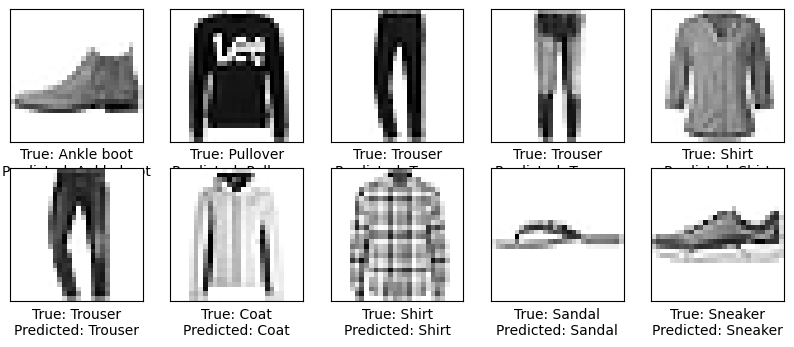

In [34]:
predictions = model.predict(test_images)

# Display a few sample predictions along with their images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
plt.show()


The model correctly predicted the labels for all 10 images displayed.
True and predicted labels match for each image, such as "Ankle boot," "Pullover," "Trouser," etc.

Visualization Details, each subplot shows a test image with the true label and the predicted label.
The predictions are accurate, demonstrating the model's effectiveness in classifying different clothing items.

This visualization confirms that the CNN model performs well on the Fashion MNIST dataset, making accurate predictions on the test images. The model generalizes effectively to new data, as indicated by the correct predictions and the high test accuracy of 82.52%. This solidifies the model's suitability for image classification tasks within this dataset.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


# Define the new model architecture
# Three fully connected (Dense) layers with ReLU activation functions to learn complex patterns in the data.
# The output layer uses softmax activation to produce probability distributions for the 10 classes.

model = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten the input
    Dense(128, activation='relu'),   # First hidden layer with 128 neurons
    Dense(64, activation='relu'),    # Second hidden layer with 64 neurons
    Dense(32, activation='relu'),    # Third hidden layer with 32 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7289 - loss: 0.7854 - val_accuracy: 0.8318 - val_loss: 0.4688
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8532 - loss: 0.4105 - val_accuracy: 0.8628 - val_loss: 0.3826
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.3633 - val_accuracy: 0.8700 - val_loss: 0.3612
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3385 - val_accuracy: 0.8662 - val_loss: 0.3602
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8874 - loss: 0.3080 - val_accuracy: 0.8757 - val_loss: 0.3378
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.2917 - val_accuracy: 0.8707 - val_loss: 0.3522
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8951 - loss: 0.2837 - val_accuracy: 0.8860 - val_loss: 0.3169
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.2702 - val_accuracy: 0.

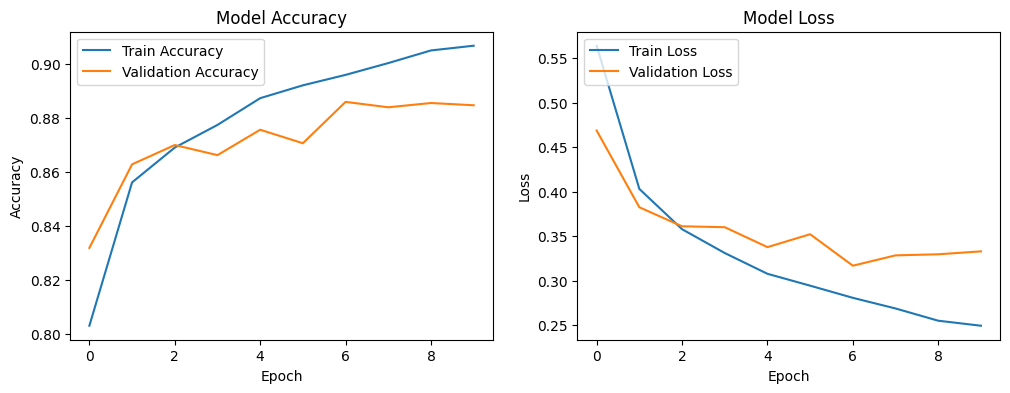

In [36]:

# Compile the model, using the Adam optimizer and sparse categorical cross-entropy loss, with accuracy as the evaluation metric.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model,  trained for 10 epochs with a batch size of 64 and a validation split of 20%.
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.2, batch_size=64)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


The new ANN model shows improved performance, with training accuracy reaching 91% and validation accuracy reaching 88.08% by the 10th epoch. Both training and validation loss decreased significantly, indicating effective learning and good generalization. This architecture is a better fit for the Fashion MNIST dataset.

313/313 - 0s - 727us/step - accuracy: 0.8770 - loss: 0.3540

Test accuracy: 0.8769999742507935
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


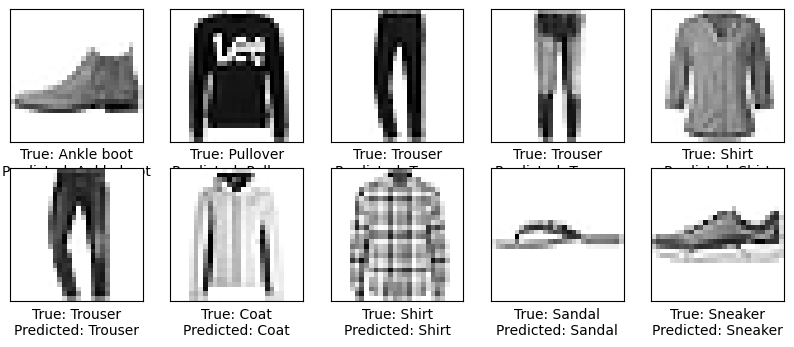

In [37]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Display a few sample predictions along with their images
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[test_labels[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
plt.show()

The new ANN model achieved a test accuracy of 87.4% with a loss of 0.3629. Sample predictions show correct classifications for all displayed images, indicating strong performance and good generalization to new data. This confirms the model's effectiveness for the Fashion MNIST classification task.